<a href="https://colab.research.google.com/github/dhaya0/stats_4/blob/main/CSSL_04_Introduction_to_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is *optimization*?
Optimization means finding the best choice among many possibilities. We encounter it in many aspects of our daily lives, such as: when we are tuning our recipe indegredients to make the food taste better, when we finding the best route to take to get to a place quickly.

Much of statistical learning deals with building models to make predictions. Optimization plays an important role here as well. In statistical learning, we optimize model settings so predictions are as close as possible to reality.

Let us take a simple example. Suppose we are predicting students' test scores based on the hours spent studying. If we assume that more study hours (h) implies better test scores (s), we can begin with a linear simple model:

$s=a+bh$

This is the equation of a straight line. Optimization in this context means adjusting a and b so the line fits the data best.

_But how do we know that a particular line fits the data best?_

Short answer - loss functions! Loss functions measure how bad our predictions are.

Good predictions->small loss

bad predictions->large loss.

So if want the model that _best_ fits the data, we need to minimize the loss.

Let us take a simple loss function and understand how to minimize the loss.

$loss = x^2$  (parabola)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Now let us plot this curve to visualize the loss function

Text(0, 0.5, 'loss')

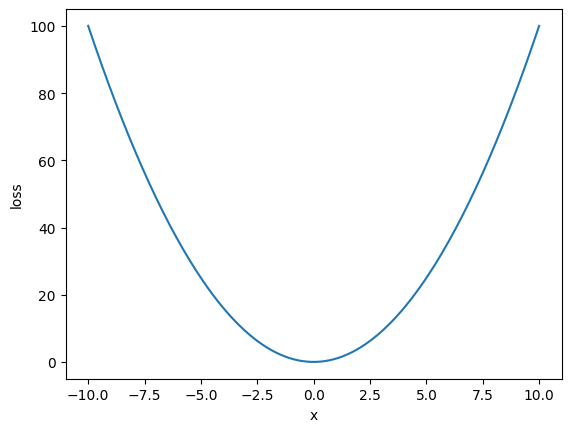

In [3]:
# Create 2 arrays of x_values and the corresponding y_values and plot the curve
def loss_func(x):
  return x**2

# Create 2 arrays of x_values and the corresponding y_values
x_values = np.arange(-10,10.1,0.1)
y_values = loss_func(x_values)

# Plot the curve
fig, ax = plt.subplots()
ax.plot(x_values, y_values)
ax.set_xlabel("x")
ax.set_ylabel("loss")

This curve has a single minimum value which occurs at x=0. Such functions which have a single global minimum are referred to as convex functions. When multiple minima exist, things get more difficult!

Now let's try walking down this gradient. The strategy is pretty simple.
1. Start with a guess
2. Look at slope (aka gradient) at that point
3. Take a small step in the downhill direction
4. Repeat steps 1-3 until you reach the base of the valley.

In [18]:
# Starting point
x=8

# How big each step is
step_size = 0.1

# Store steps for plotting
steps = [x]

# Create a loop for the repetition step and move downhill in each step
for s in range(100):
  slope = 2*x

  if slope > 0:
    next_x = x - step_size
  elif slope < 0:
    next_x = x + step_size
  else:
    break
  steps.append(next_x)
  x = next_x

# Change the step size and steps (inside range) to check how it reaches minima.
# Fixed steps not reliable.
# For ex, 1,10... 1,5... etc

Let us try visualizing the walk

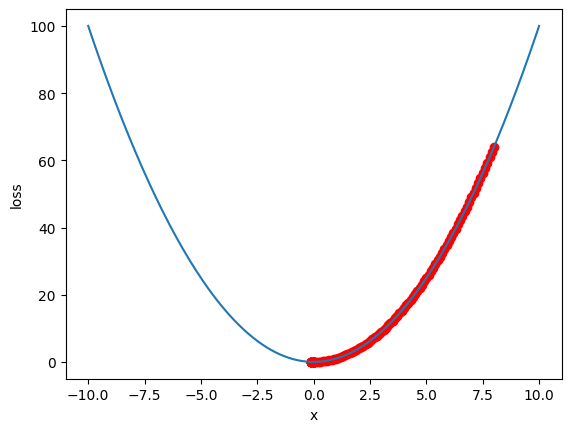

In [19]:
# Plot the curve and the steps that you took to reach the minimum

fig, ax = plt.subplots()
ax.plot(x_values, y_values)
ax.set_xlabel("x")
ax.set_ylabel("loss")

plt.scatter(steps, loss_func(np.array(steps)), color='red')

In [33]:
# Starting point
x=8

# How big each step is
learning_rate = 0.5

# Store steps for plotting
steps = [x]

# Create a loop for the repetition step and move downhill in each step
for s in range(200):
  slope = 2*x

  next_x = x - slope*learning_rate
  steps.append(next_x)
  x = next_x

# Change the step size and steps (inside range) to check how it reaches minima.
# Fixed steps not reliable.
# For ex, 1,10... 1,5... etc

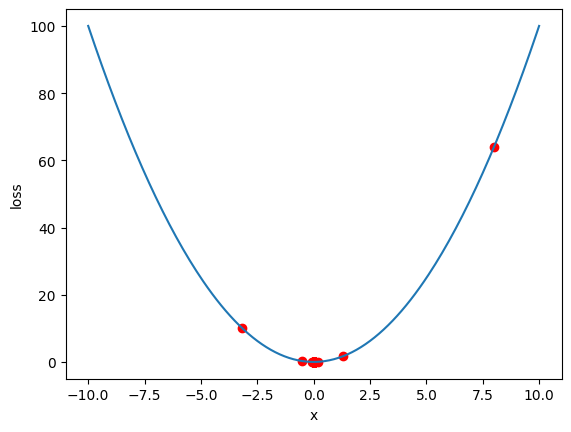

In [34]:
# Plot the curve and the steps that you took to reach the minimum

fig, ax = plt.subplots()
ax.plot(x_values, y_values)
ax.set_xlabel("x")
ax.set_ylabel("loss")

plt.scatter(steps, loss_func(np.array(steps)), color='red')

### Homework
1. Draw a curve with multiple minima. Why do you think it would be difficult to get to the absolute minimum (aka global minimum) in this case?
2. Can you write a simple mathematical equation that has multiple minima?

In [41]:
def non_convex_loss(x):
  return x**4 - 10*x**2 + 5*x

Text(0, 0.5, 'loss')

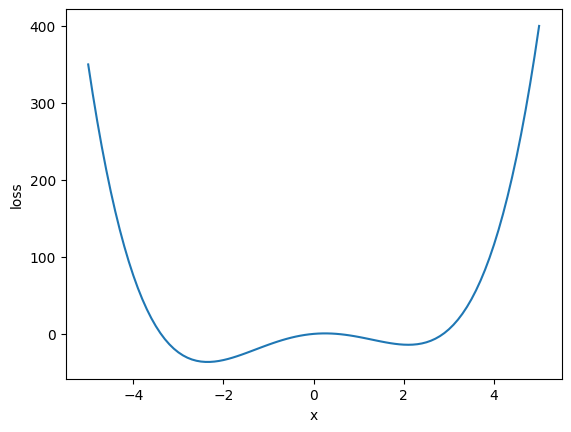

In [42]:
# Create 2 arrays of x_values and the corresponding y_values
x_values = np.arange(-5, 5.1, 0.1)
y_values = non_convex_loss(x_values)

# Plot the curve
fig, ax = plt.subplots()
ax.plot(x_values, y_values)
ax.set_xlabel("x")
ax.set_ylabel("loss")

# Uncertain about the minima you might reach

In [52]:
# Starting point
x=4.5

# How big each step is
learning_rate = 0.01

# Store steps for plotting
steps = [x]

# Create a loop for the repetition step and move downhill in each step
for s in range(200):
  slope = 4*x**3 - 20*x + 5

  next_x = x - slope*learning_rate
  steps.append(next_x)
  x = next_x

# Change the step size and steps (inside range) to check how it reaches minima.
# Fixed steps not reliable.
# For ex, 1,10... 1,5... etc

2.0986620564775165


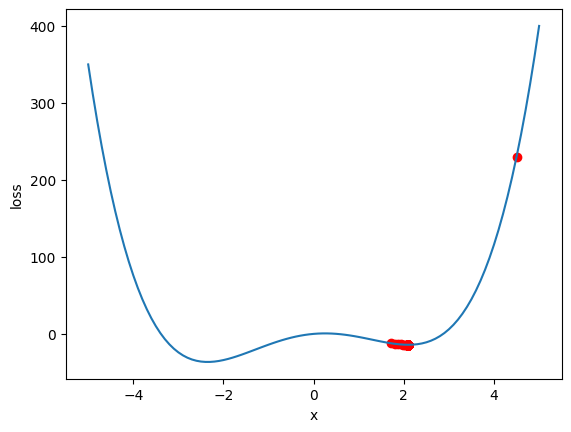

In [55]:
# Plot the curve and the steps that you took to reach the minimum

fig, ax = plt.subplots()
ax.plot(x_values, y_values)
ax.set_xlabel("x")
ax.set_ylabel("loss")

plt.scatter(steps, non_convex_loss(np.array(steps)), color='red')

At the minimum, slope is zero. Also at the maxima.
How to find them?
Second derivative positive implies minima, negative implies maxima.
More than one minima - non convex
QUIZ: finding minima, maxima
